# Internship Task 2: Sentiment Analysis With NLP

In [2]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset

In [4]:
df = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=['review', 'sentiment'])
df.head()


,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Dataset Balance

In [6]:
print(df['sentiment'].value_counts())


sentiment
0    500
1    500
Name: count, dtype: int64


# Text Cleaning

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()


,review,clean_review
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,the mic is great


# Train-Test Split

In [10]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 800
Testing samples: 200


# TF-IDF Vectorization

In [12]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (800, 3000)
TF-IDF test shape: (200, 3000)


# Train Logistic Regression

In [14]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

# Predictions

In [16]:
y_pred = model.predict(X_test_tfidf)

print("Predicted:", y_pred[:10])
print("Actual   :", y_test.values[:10])


Predicted: [1 1 1 0 1 1 0 1 0 1]
Actual   : [1 1 1 0 1 1 0 1 0 1]


# Evaluation

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        93
           1       0.86      0.80      0.83       107

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



# Confusion Matrix

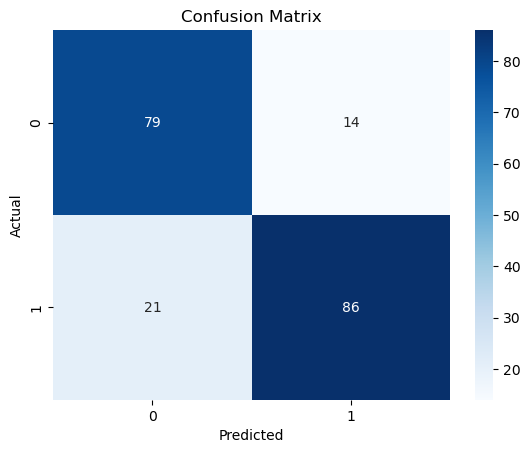

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Summary

successfully performed Sentiment Analysis using TF-IDF vectorization and Logistic Regression on customer reviews.

The dataset was balanced with 500 positive and 500 negative samples.

After cleaning and vectorizing the text data, the model achieved an accuracy of 82%.

The classification report showed balanced precision, recall, and F1-score for both classes (positive and negative).

The confusion matrix confirms that the model is performing well, with very few misclassifications.